# Name, etc

# Introduction

This CA consists of 2 parts. Neural Networks and Semantic analysis.

### Neural Networks

You are required to take data stored file “BankRecords.csv”, available on Moodle and process the data into a DataFrame. 
You are then required to train a Neural Network to predict the “Income(Thousands’)” of the customers, including tuning the network to achieve the best results.
You must also compare your neural network to a standard ML regressor of your choosing and discuss your findings in the context of the problem at hand.

### Semantic Analysis

You are required to source text data from any social media platform on any topic that you choose and perform semantic analysis on the text. This analysis should provide a visualization of  the overall sentiment of your text data , showing the positive, neutral, and negative sentiment expressed. You will require at least 1000 text observations.

In [1]:
# Import libraries needed

import numpy as py
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Load Data
data = pd.read_csv("C:/Users/henri/Documents/GitHub/CA-Machine-Learning/BankRecords.csv")

# Print five first rows
data.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


Below we have a better visualization of what our dataset looks like. The dataset consists of 14 columns and each column contains information about each individual within the dataset. The dataset has information about :
The ID of the client, age, how many years of work experience, their income in thousands, their sort code number, how many integrants in the family, their credit score, the education level, the mortgage in thousands if any, if they have any personal loans pending, securities account, if they own a cd account, online banking and if they have a credit card or no.

# Data Preparation

Data preparation is a very important step in the process of Machine Learning. It envolves preprocessing, cleaning and then transforming raw data into a suitable format for the analysis. In this step I have checked for any missing or duplicated valeues within our data, in this case I had no missing or duplicated values and it is very good, it will prevent any potential biases or inaccuracies that may arise from duplicate or missing values. If I had had any missing values in the dataset I would drop that specific column and if any duplicated values I would first check those values and see if they were necessary.

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64
Number of duplicate rows: 0


C:\Users\henri\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\henri\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


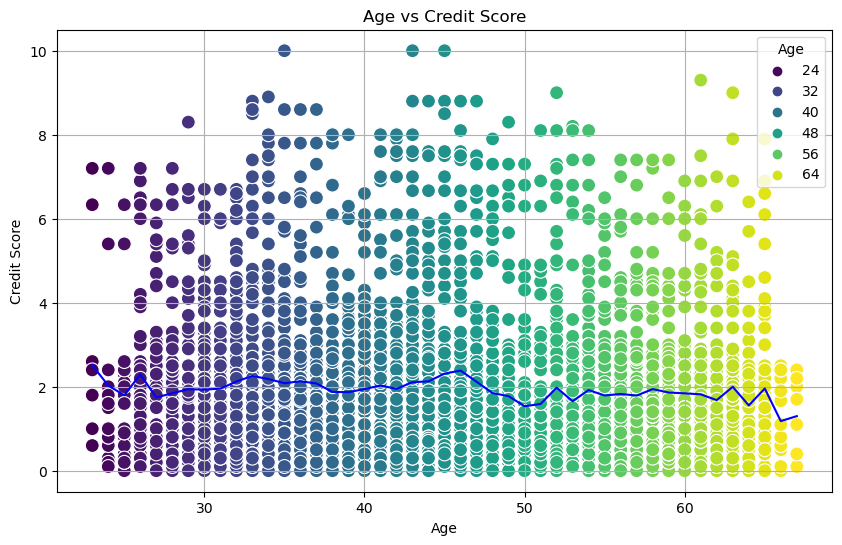

In [4]:
# Plotting Age vs Credit Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Credit Score', data=data, hue='Age', palette='viridis', s=100)
sns.lineplot(x='Age', y='Credit Score', data=data, color='blue', markers=True, err_style=None)
plt.title('Age vs Credit Score')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.legend(title='Age')
plt.grid(True)
plt.show()

After analysing the plotted graph, we can observe that individuals ranging from 24-30 have a better credit score compared with older ages. The reason behind that can be due do young adults in their early 20s are more likely to have higher credit utilization ratios due to lower incomes and higher expenses associated with education, car and other expenses. As individuals progress into their late 20s and early 30s, they may have paid down their debt and therefore improved their credit, positively impacting their credit scores.

In this step of the Data Preparation, I will encode the categorical variables  like 'Education', 'Personal Loan', etc., within the dataset, are converted into numerical representations using label encoding and standardize the numerical features, 'Age', 'Experience(Years)' , 'Credit Score', 'Mortgage(Thousands's)', to have a mean value of 0 and a standard deviation to 1. Encodeing the categorial variables is necessary because many machine learning algorithms work with numerical data and may not directly handle categorical variables and standardizing ensures that all numerical features contribute equally to the model training , preventing features with larger scales from dominating the model learning.

In [5]:
# Encode categorical variables
label_encoders = {}
categorical_features = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ["Age", "Experience(Years)" , "Credit Score", "Mortgage(Thousands's)"]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [6]:
# Create correlation matrix
matrix = data.corr()
print(matrix)

                             ID       Age  Experience(Years)  \
ID                     1.000000 -0.008473          -0.008326   
Age                   -0.008473  1.000000           0.994215   
Experience(Years)     -0.008326  0.994215           1.000000   
Income(Thousands's)   -0.017695 -0.055269          -0.046574   
Sort Code              0.013432 -0.029216          -0.028626   
Family                -0.016797 -0.046418          -0.052563   
Credit Score          -0.024672 -0.052030          -0.050089   
Education              0.016006  0.037168           0.023346   
Mortgage(Thousands's) -0.013920 -0.012539          -0.010582   
Personal Loan         -0.024801 -0.007726          -0.007413   
Securities Account    -0.016972 -0.000436          -0.001232   
CD Account            -0.006909  0.008043           0.010353   
Online Banking        -0.002528  0.013702           0.013898   
CreditCard             0.017028  0.007681           0.008967   

                       Income(Thousands

In [7]:
# Split the data into training and testing sets
X = data.drop(["ID", "Income(Thousands's)", "Sort Code"], axis=1)
y = data["Income(Thousands's)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [8]:
# Linear Regression

# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R2 Score: {r2}")

Linear Regression MSE: 952.9986376080267
Linear Regression R2 Score: 0.5505827710436557


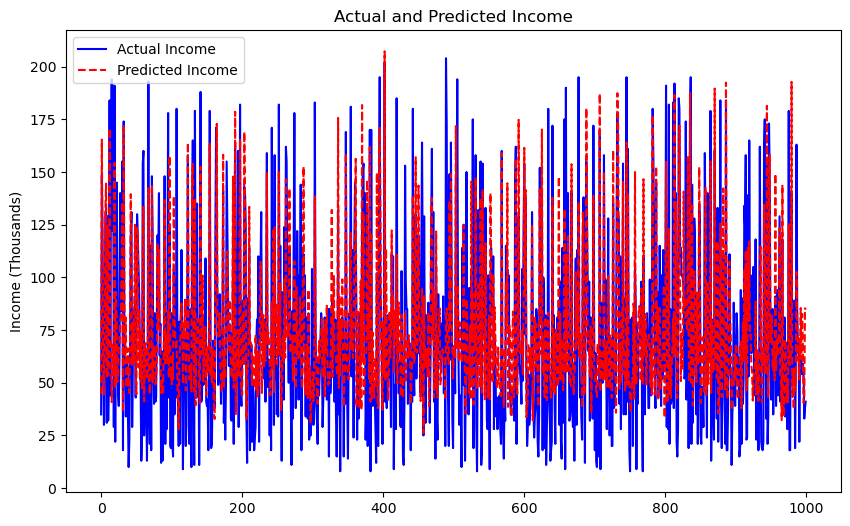

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Income')
plt.plot(range(len(y_test)), y_pred, color='red', linestyle='--', label='Predicted Income')
plt.xlabel('')
plt.ylabel('Income (Thousands)')
plt.title('Actual and Predicted Income')
plt.legend()
plt.show()

# Artificial Neural Network

In [10]:
# Split the data into training and testing sets
X = data.drop(["ID", "Income(Thousands's)", "Sort Code"], axis=1)
y = data["Income(Thousands's)"]

# One-hot encode the 'Education' column
X = pd.get_dummies(X, columns=["Education"], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical columns
numerical_columns = ["Age", "Experience(Years)", "Family", "Credit Score", "Mortgage(Thousands's)"]
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Convert DataFrame to NumPy array and specify data types
X_train_np = X_train.values.astype('float32')
y_train_np = y_train.values.astype('float32')

# Convert test data to NumPy arrays
X_test_np = X_test.values.astype('float32')
y_test_np = y_test.values.astype('float32')

# Define the keras model
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))  # Remove activation function for regression

# Compile the model for regression
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

# Fit the keras model on the dataset
model.fit(X_train_np, y_train_np, epochs=150, batch_size=10)

C:\Users\henri\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7092.6738 - mae: 70.5621 - mse: 7092.6738
Epoch 2/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1871.1367 - mae: 32.9482 - mse: 1871.1367
Epoch 3/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1074.3071 - mae: 25.5186 - mse: 1074.3071
Epoch 4/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1020.2695 - mae: 25.1645 - mse: 1020.2695
Epoch 5/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 934.2770 - mae: 24.1240 - mse: 934.2770
Epoch 6/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 898.1737 - mae: 23.7449 - mse: 898.1737
Epoch 7/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 948.7756 - mae: 24.2661 - mse: 948.7756
Epoch 8/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 877.7721 - mae: 23.4654 - mse: 877.7721
Epoch 9/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 875.4409 - mae: 23.4470 - mse: 875.4409
Epoch 10/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 928.2885 - mae: 23.84

400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 787.1196 - mae: 22.0691 - mse: 787.1196
Epoch 62/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 781.4053 - mae: 21.9845 - mse: 781.4053
Epoch 63/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 868.6682 - mae: 23.1892 - mse: 868.6682
Epoch 64/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 819.6100 - mae: 22.6338 - mse: 819.6100
Epoch 65/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 818.2717 - mae: 22.5607 - mse: 818.2717
Epoch 66/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 834.2893 - mae: 22.6903 - mse: 834.2893
Epoch 67/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 794.3431 - mae: 22.1032 - mse: 794.3431
Epoch 68/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 815.7820 - mae: 22.5784 - mse: 815.7820
Epoch 69/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 792.9347 - mae: 22.2684 - mse: 792.9347
Epoch 70/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 797.9561 - mae: 22.3968 - mse: 79

400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 774.9713 - mae: 21.7357 - mse: 774.9713
Epoch 122/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 793.5323 - mae: 21.9543 - mse: 793.5323
Epoch 123/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 773.7922 - mae: 21.8236 - mse: 773.7922
Epoch 124/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 811.2951 - mae: 22.3367 - mse: 811.2951
Epoch 125/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 761.3810 - mae: 21.5935 - mse: 761.3810
Epoch 126/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 762.7862 - mae: 21.7891 - mse: 762.7862
Epoch 127/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 802.6805 - mae: 22.1209 - mse: 802.6805
Epoch 128/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 789.3539 - mae: 21.8530 - mse: 789.3539
Epoch 129/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 755.8589 - mae: 21.6328 - mse: 755.8589
Epoch 130/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 762.7742 - mae: 21.4765 

In [11]:
# make class predictions with the model
predictions = model.predict(X_test_np)
# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X_test_np[i].tolist(),
    predictions[i], y[i]))

# evaluate the model using Mean Absolute Error
loss, mae, mse_ann = model.evaluate(X_test_np, y_test_np)
print('Neural Network Mean Absolute Error: %.2f' % mse_ann)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[-1.3327505588531494, -1.3982338905334473, -0.3333435654640198, -0.9324426651000977, -0.5523508191108704, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0] => 33 (expected 49)
[0.1520623117685318, 0.26012182235717773, 1.4130536317825317, 2.383146047592163, -0.5523508191108704, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0] => 147 (expected 34)
[-1.3327505588531494, -1.310952067375183, -0.3333435654640198, 0.6681864261627197, 3.388441562652588, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0] => 135 (expected 11)
[-1.2454086542129517, -1.2236701250076294, -1.2065422534942627, -0.5322853922843933, -0.5523508191108704, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0] => 85 (expected 100)
[1.4621913433074951, 1.3947863578796387, 0.5398550629615784, -0.7037813663482666, -0.5523508191108704, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0] => 45 (expected 45)


C:\Users\henri\AppData\Local\Temp\ipykernel_5140\2340361878.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %d (expected %d)' % (X_test_np[i].tolist(),


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 819.6688 - mae: 21.8354 - mse: 819.6688   
Neural Network Mean Absolute Error: 750.71


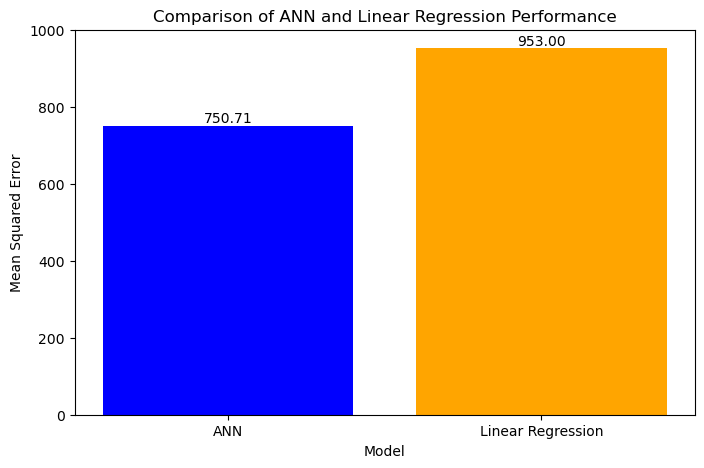

In [12]:
# Models and their MSE values
models = ['ANN', 'Linear Regression']
mse_values = [mse_ann, mse_lr]

# Create graph
plt.figure(figsize=(8, 5))
plt.bar(models, mse_values, color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of ANN and Linear Regression Performance')

# Adding the MSE values on top of the bars
for i, value in enumerate(mse_values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

# Display the plot
plt.show()

# Sentimental Analysis

Reviews about the new Spider Man movie

In [13]:
# Import libraries needed

import nltk 
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\henri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
# Create variables to store the three reviews
review1 = "In 2002, Sam Raimis SpiderMan swung into theaters and changed everything. The film was a massive, massive success at the box office, and when that happens, producers and studios get itchy. If SpiderMan was a hit, surely more superhero movies would hit just as big! Of course, that wasnt true, and we got a series of mixed super flicks, some good, some not so good. Then came along and gave us the onetwo punch of Iron Man and The Dark Knight. The realistic superhero era was born thanks to The Dark Knight, while Iron Man paved the way for the Marvel Cinematic Universe. And weve been buried under the weight of it all ever since. It is fair to say were overloaded with superhero movies. Im not here to deride anyone who still derives pleasure from these things, but as for me, I burned out on the subgenre a while ago. They all blend together into one CGIenhanced mess in my mind. And yet, every now and then, a movie comes along to remind me that — in the right hands — theres still a little magic left to be conjured. Such was the case with 2018s wonderful SpiderMan: Into the SpiderVerse, a film that used the medium of animation to create something stylish, and grand, and beautiful. On top of that, there was a touching, emotional journey as Brooklyn kid Miles Morales (voiced by Shameik Moore) learned to become SpiderMan, backed up by some SpiderPeople from other dimensions. Now Miles is back with SpiderMan: Across the SpiderVerse, a sequel thats bigger and bolder than the first ... and also incomplete. By making this the first of two films, writers Phil Lord, Christopher Miller, and David Callaham have crafted a movie that doesnt really feel like a movie — its just a chapter. An exciting chapter, sure, but an unfinished chapter that runs out the clock, torpedoing all the momentum it was building in the process. All right, lets do this one last time. Its been a year since Miles became SpiderMan, and while hes clearly improved his spideyskills in that year (and grown a little too — one of the films neat choices is to make many of the characters look slightly older), hes struggling to juggle both his normal student life and his superhero alter ego. His parents, father Jefferson (Brian Tyree Henry) and mother Rio (Luna Lauren Vélez), want to know why Miles is late to everything all the time, and Rio is convinced her son is hiding something. The moments between Miles and his parents are funny, warm, and full of big, emotional beats where Miles struggles to tell them the truth but ultimately decides he cant. His parents, for their part, want to understand, but can only operate based on what Miles is telling them, and hes not telling them much. As for Miles, hes in a bit of a funk. He misses his friends from alternate universes, especially Gwen Stacy (Hailee Steinfeld), another SpiderPerson who is ten times cooler than he is. Miles is unable to jump between dimensions and universes, therefore he assumes hes never going to see Gwen again. But Gwen soon comes calling, and we learn that shes been recruited by the Spider Society, a group of what seems to be thousands upon thousands of SpiderPeople all under the leadership of Miguel OHara, aka SpiderMan 2099, a futuristic SpiderMan who is also a vampire (hey, thats cool!). Hes also, in the words of Miles mentor Peter B. Parker (Jake Johnson), the only SpiderMan who doesnt tell jokes. Miguel has no time for crackingwise — he has multiverses to save, damn it! Meanwhile, a bad guy named The Spot (Jason Schwartzman), his body covered in portals to other locations and dimensions, has arrived on the scene. Miles dismisses this somewhat buffoonish figure as a villain of the week, but The Spot is growing more powerful, and that could mean serious, serious trouble for Miles. Directors Joaquim Dos Santos, Kemp Powers, and Justin K. Thompson, and their animators, create all of this in stunning, jawdropping detail. Animation is what makes the SpiderVerse films so special — because they dont play by traditional animation rules. In fact, they ask the question: Why have rules at all? The worlds on display here are pop art extravaganzas, bursting with color and vibrancy. They feel more alive, more livedin, than the vast majority of the CGIenhanced worlds that liveaction superheroes inhabit. Some of the best moments of Across the SpiderVerse happen when the scenery takes center stage. Theres a stunning, lovely little scene where Miles and Gwen sit upsidedown on a skyscraper looking out over New York, the skyline vast and sparkling and stretching on seemingly forever. You get the sense that every single one of those buildings is full of people with their own little stories just waiting to be told. Later, a conversation with Gwen and her father features shifting backgrounds where the colors change to pastels, watercolors, and abstract shapes. Its gorgeous to look at. As are the many pulsepounding fight scenes, where characters spin and flip and twirl through modernist art backgrounds, the colors popping, the energy never letting up. Theres a wonderful fight between Miles and The Spot where Miles keeps falling through the portals all over The Spots body, making it hard to land a punch; that sort of inventiveness goes a long way. Since Into the SpiderVerse already established the formula, Across the SpiderVerse is free to get even crazier and more creative, throwing brilliant ideas up on the screen. Theres a villain animated to look like he just jumped out of the pages of Leonardo Da Vincis sketchbook. And theres the nononsense SpiderPunk (a very funny Daniel Kaluuya), whose animation style keeps changing from shot to shot, designed to look like hes been torn from a band poster plastered against a wall in an alley. These artistic choices are delightful, and they mix with a sweethearted script packed with jokes (some that land, others that definitely do not) to create a wild, inventive, entertaining film with propulsive energy and style to spare. Across The SpiderVerse is a movie on its own, but it definitely ends on a bit of a cliffhanger. So said codirector Kemp Powers in a recent interview about the film. Heres the thing: Im not quite sure that this really is a movie on its own. Cliffhangers are nothing new in the world of film — they date all the way back to silent movie serials. And of course, The Empire Strikes Back, one of the most beloved blockbusters of all time, concludes with a cliffhanger. But Empire also feels like it tells a complete story. Theres plenty of room for that story to continue, but the film itself never seems incomplete. Most recently, another space opera, Denis Villeneuves Dune, did something similar, ending with a setup for the sequel while also giving us what came across as a (mostly) complete narrative. Across the SpiderVerse, however, is in a mad dash to get to the third movie, making everything that happens here little more than a steppingstone to the real story, the one we cant have just yet."
review2 = "The first reactions are in for SpiderMan Across the SpiderVerse, with critics and journalists saying the film is an actual work of art while also darker and sadder than expected. The longawaited sequel to 2018s highly successful animated adventure SpiderMan Into the SpiderVerse, Across the SpiderVerse picks up over a year after the events of the first film. Miles Morales SpiderMan Shameik Moore is approached by Gwen Stacy SpiderWoman Hailee Steinfeld to help her complete a mission that will save every universe from supervillain the Spot Jason Schwartzman. Together, Miles and Gwen travel through the Multiverse, where they encounter the SpiderSociety, led by Miguel OHara Oscar Isaac. CinemaBlend managing editor Sean OConnell wrote on Twitter that the film lives one step above Masterpiece. Its an actual work of art. Every frame deserves to be hung in a museum. The jokes and nods to Spidey lore are perfect.. THR writer Brian Davids teased that Across the SpiderVerse is darker and sadder than I expected, but necessary. Davids also praised Steinfelds performance as Gwen, saying she really comes into her own. Meanwhile, Rotten Tomatoes writer Tessa Smith said Across the SpiderVerse raises its own bar which seemed impossible. There are shocking twists, unexpected surprises and a story that truly makes sense for the crazy multiverse world that we have all jumped head first in to, Smith continued. Uproxx writer Mike Ryan concurred, tweeting that the sequel is not surprisingly terrific and is still about Miles just wanting to be accepted for who he is. However, not everyone was a fan of the sequel. This Week Media editor in chief Eze Baum said that the film ultimately fails to come close to where the original is for me, mainly due to the fact that it prioritizes fan service over a strong story."
review3 = "The most recent SpiderMan Far From Home trailer gave us our first look at the Marvel Cinematic Universe postAvengers Endgame. While the highly anticipated Spidey sequel is still technically part of Phase 3, it will also set the stage for what looks to be an exciting future in the MCU. It was heavily speculated that the events of Avengers Endgame would forever change the Marvel Cinematic Universe, and now thanks to the SpiderMan Far From Home trailer, we have a better idea as to how. As revealed by Nick Fury himself, the snap tore a hole in our dimension, effectively introducing the multiverse. As the trailer explains, Quentin Beck/Mysterio Jake Gyllenhaal comes from Earth, just not ours. The introduction of the multiverse is a huge twist that has infinite possibiltiies as far as the future of the Marvel Cinematic Universe is concerned. Of course, the concept of a multiverse is not exactly a new thing to comic book fans. SpiderMan fans, in particular, are especially familiar with the idea of alternate universes, especially after last year's SpiderMan Into the SpiderVerse. Sony's animated hit was all about the introduction of the SpiderVerse, where multiple alternative versions of the webslinger exist in different dimensions. That brings us to a recent tweet from the official SpiderMan Into the SpiderVerse Twitter acount. Just days after the SpiderMan Far From Home trailer, the official social media channel for the animated movie posted a picture of SpiderMan peering into what appears to be the collider from the film which opened up the different dimensions. Alongside the photo is the caption See you in another dimension, followed by the peace fingers and spider emoji. Interestingly, the image features a SpiderMan more closely resembling Peter Parker in the traditional red and blue outfit, not Miles Morales who donned a black and red suit in Into the SpiderVerse. Speculation is running rampant following the cryptic tweet especially since another clip from Far From Home was released with Mysterio specifically mentioning Earth616 and Earth833. Clearly, Phase 4 of the Marvel Cinematic Universe is going to be unlike anything Marvel Studios has done on the big screen. Is Sony simply acknowleding the multiverse in SpiderMan Far From Home, or is something bigger in the works  a major crossover between the MCU and Sony's own SpiderMan movies Into the SpiderVerse, Venom, etc., perhaps With Marvel Studios working closely with Sony on the SpiderMan MCU trilogy, it's not unreasonable to think that the two companies haven't discussed bigger picture plans. Can you imagine all of the actors who have portrayed Peter Parker Andrew Garfield, Tobey Maguire, Jake Johnson, to name a few appearing within the MCU What about Into the SpiderVerse's Miles Morales Far From Home director Jon Watts was recently asked if Miles Morales will factor into the upcoming film in any way, and he a very interesting response. There is no Miles in this film, or at least not yet. Watts teased. But who knows... we edit these films down to the last second, so you never know. Of course, it's entirely possible that the Into the SpiderVerse tweet could simply serve as a reminder that a sequel film, a SpiderWoman spinoff, and a television series all inspired by the animated feature are coming in the future. What do you think the See you in another dimension tweet could mean We'll get a better idea when SpiderMan Far From Home swings into theaters on July 2."

# Analyze sentiment for each review
sentiment_scores = []
for review_var in ['review1', 'review2', 'review3']:
    review = globals()[review_var] 
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(review)
    sentiment_scores.append(sentiment_score)

# Classify sentiment for each review
def classify_sentiment(sentiment_score):
    compound_score = sentiment_score['compound']
    if compound_score >= 0.05:
        sentiment = "Positive"
    elif compound_score <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return sentiment

# Print sentiment for each review
for i, sentiment_score in enumerate(sentiment_scores):
    sentiment = classify_sentiment(sentiment_score)
    print(f"Review {i+1}:")
    print("Positive:", sentiment_score['pos'])
    print("Negative:", sentiment_score['neg'])
    print("Compound Score:", sentiment_score['compound'])
    print("Sentiment:", sentiment)
    print()

# Create a DataFrame with the reviews for better visualization
data = {
    'Review': ['Review1', 'Review2', 'Review3'],
    'Sentiment': [classify_sentiment(sentiment_score) for sentiment_score in sentiment_scores]
}
dataframe = pd.DataFrame(data)

# Display DataFrame
print(dataframe)

Review 1:
Positive: 0.144
Negative: 0.064
Compound Score: 0.9988
Sentiment: Positive

Review 2:
Positive: 0.098
Negative: 0.099
Compound Score: -0.0182
Sentiment: Neutral

Review 3:
Positive: 0.067
Negative: 0.007
Compound Score: 0.979
Sentiment: Positive

    Review Sentiment
0  Review1  Positive
1  Review2   Neutral
2  Review3  Positive


# References

https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/ (28/05)
A Neural Network model using python, pdf given in class week 15/05 (30/05)
https://www.analyticsvidhya.com/blog/2021/10/implementing-artificial-neural-networkclassification-in-python-from-scratch/ (29/05)

# References Semantic Analysis

https://www.youtube.com/watch?v=u7tX7IWVjbQ (30/05)
https://x.com/cevangelista413/status/1663893415115800576 (30/05)
https://www.slashfilm.com/1300967/spider-man-across-the-spider-verse-review/ (30/05)
https://variety.com/2023/film/news/spider-man-across-the-spider-verse-reactions-1235624765/ (30/05)
https://comicbookmovie.com/spider_man/into-the-spider_verse/cryptic-spider-man-into-the-spider-verse-tweet-fuels-far-from-home-and-mcu-multiverse-speculation-a168255 (03/05)